In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
%matplotlib inline
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)

In [2]:
from sklearn.datasets import fetch_california_housing
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

data = fetch_california_housing()

# Print the description to understand the structure of the dataset
print(data.DESCR)

# Check the number of arrays in the dataset
num_arrays = len(data.data)
print("Number of arrays in the dataset:", num_arrays)
print("Number of Features:", data.data.shape[1])
print("Features:", data.feature_names)
print("Target:", data.target_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

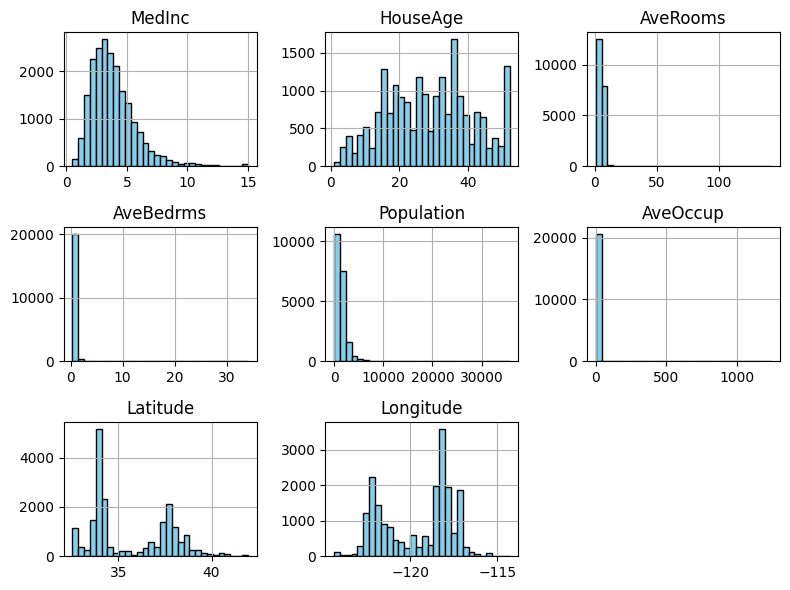

In [3]:
# Iterate through each feature and plot its histogram
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(8, 6))

# Iterate through each feature and plot its histogram in the corresponding subplot
for feature_index, ax in enumerate(axes.flatten()):
    if feature_index < data.data.shape[1]:  # Check if feature index is within bounds
        ax.hist(data.data[:, feature_index], bins=30, color='skyblue', edgecolor='black')
        ax.set_title(data.feature_names[feature_index], size=12)  # Set the feature name as title
        ax.grid(True)
    else:
        ax.axis('off')  # Turn off empty subplots if there are fewer than 9 features

plt.tight_layout()
plt.show()

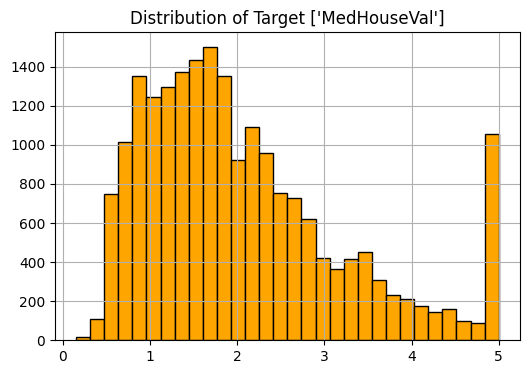

In [4]:
# Plot distribution of the target variable
plt.figure(figsize=(6, 4))
plt.hist(data.target, bins=30, color='orange', edgecolor='black')
plt.title(f'Distribution of Target {data.target_names}')
plt.grid(True)
plt.show()

- The distribution in some of the features are skewed.
- Let's build the first network without outliers removal. Then we can compare the results later.

### When working with `PyTorch`, we need to convert data into `tensors`. 
1. PyTorch tensors are similar to NumPy arrays but can utilize GPU acceleration for numerical computations.
2. In PyTorch, if you're working with neural networks and you have a single output neuron in your neural network model (which is common in regression tasks), the model typically expects the target variable to have a shape of `(num_samples, 1)`. The reshaping with `.reshape(-1, 1)` accomplishes this by adding an additional dimension to the target variable, ensuring it has the shape `(num_samples, 1)`.

In [5]:
from sklearn.preprocessing import StandardScaler

X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform training set
X_test_scaled = scaler.transform(X_test)       # Transform test set based on the distribution of the training set

# Convert data into PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

### Building Neural Network
https://pytorch.org/docs/stable/index.html

This is a **regression** problem. With neural networks, we typically use **linear activation** (i.e., no activation) in the output layer, so that the output range can theoretically be anything from negative infinity to positive infinity.

In [6]:
# Simple linear regression model (but we don't use this)
class LinearRegressionNN(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionNN, self).__init__()
        self.linear = nn.Linear(in_features=input_size, out_features=1)  # Output size is 1 for regression

    def forward(self, x):  
        return self.linear(x)

In [7]:
# Define a simple non-linear regression model
class RegressionNN(nn.Module):
    def __init__(self, input_size, hidden_dim):
        super(RegressionNN, self).__init__()
        self.input_to_hidden = nn.Linear(in_features=input_size, out_features=hidden_dim) # hidden layer 1
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(in_features=hidden_dim, out_features=1) #Output size is 1 for regression

    def forward(self, x):
        z = self.input_to_hidden(x)
        h = self.activation(z)        
        return self.output_layer(h)

In [8]:
# Function to initialize weights and biases for reproducibility
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias)

Epoch [10/500], Loss: 2.5597
Epoch [20/500], Loss: 1.4770
Epoch [30/500], Loss: 1.1388
Epoch [40/500], Loss: 1.0004
Epoch [50/500], Loss: 0.9257
Epoch [60/500], Loss: 0.8772
Epoch [70/500], Loss: 0.8417
Epoch [80/500], Loss: 0.8137
Epoch [90/500], Loss: 0.7909
Epoch [100/500], Loss: 0.7716
Epoch [110/500], Loss: 0.7550
Epoch [120/500], Loss: 0.7406
Epoch [130/500], Loss: 0.7280
Epoch [140/500], Loss: 0.7169
Epoch [150/500], Loss: 0.7071
Epoch [160/500], Loss: 0.6983
Epoch [170/500], Loss: 0.6904
Epoch [180/500], Loss: 0.6832
Epoch [190/500], Loss: 0.6766
Epoch [200/500], Loss: 0.6705
Epoch [210/500], Loss: 0.6649
Epoch [220/500], Loss: 0.6595
Epoch [230/500], Loss: 0.6546
Epoch [240/500], Loss: 0.6499
Epoch [250/500], Loss: 0.6454
Epoch [260/500], Loss: 0.6410
Epoch [270/500], Loss: 0.6369
Epoch [280/500], Loss: 0.6328
Epoch [290/500], Loss: 0.6289
Epoch [300/500], Loss: 0.6250
Epoch [310/500], Loss: 0.6213
Epoch [320/500], Loss: 0.6177
Epoch [330/500], Loss: 0.6142
Epoch [340/500], Lo

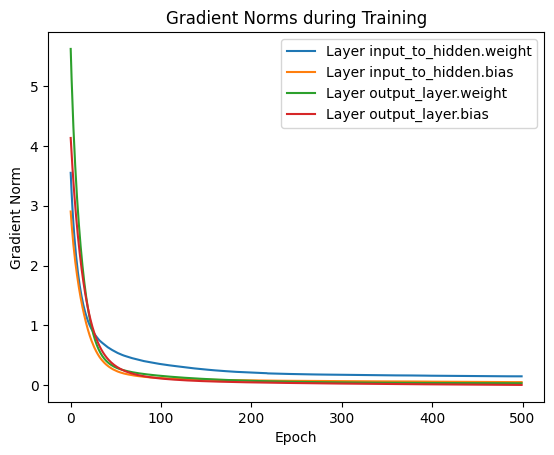

Test Loss: 0.5637


In [9]:
# Define model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
hidden_dim = 8  # Number of units in the hidden layer
model = RegressionNN(input_size, hidden_dim)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 500
torch.manual_seed(random_seed)

# Apply weight and bias initialization to all layers in the model
model.apply(init_weights)

# Define lists to store gradient norms for each parameter
grad_norms = [[] for _ in model.parameters()]

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_func(outputs, y_train_tensor)
    loss.backward()
    
    # Compute and store gradient norms
    for i, param in enumerate(model.parameters()):
        grad_norms[i].append(param.grad.norm().item())
    
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualize gradient norms
layer_name=[name for name, _ in model.named_parameters()]
for i, norms in enumerate(grad_norms):
    plt.plot(norms, label=f'Layer {layer_name[i]}')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norms during Training')
plt.legend()
plt.show()

# Evaluate the model
with torch.no_grad():
    # Predictions on test set
    predictions = model(X_test_tensor)
    test_loss = loss_func(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

In [10]:
pd.options.display.max_rows = None
# detach will not build a gradient computational graph (no backpropagation) 
y_pred = model(X_test_tensor).detach()
y_pred_array = y_pred.numpy()
y_pred_array

array([[0.95278966],
       [1.3058563 ],
       [2.6290922 ],
       ...,
       [1.735446  ],
       [2.6838243 ],
       [3.5031135 ]], dtype=float32)

In [11]:
list(model.named_parameters())

[('input_to_hidden.weight',
  Parameter containing:
  tensor([[ 5.3178e-01,  6.1534e-01, -1.4702e-01,  6.2067e-01,  2.5322e-03,
            4.4128e-02, -2.5725e-01,  7.0118e-02],
          [ 5.0953e-01, -4.4274e-01,  5.1939e-01,  1.3288e-01,  5.2027e-01,
            6.9756e-02,  2.2936e-01, -1.3693e-01],
          [ 5.2970e-01,  6.2443e-02, -3.1603e-01,  2.3797e-01,  1.7489e-02,
           -1.6152e-01, -3.4822e-01,  1.0738e-01],
          [-5.2448e-01, -3.2034e-01, -1.1764e-01, -3.8557e-01,  2.3763e-02,
           -5.8799e-01,  5.3603e-01, -3.3187e-01],
          [ 4.3402e-01,  6.3085e-02, -2.4874e-01,  3.4485e-01, -1.5937e-02,
            5.3501e-01, -1.3921e-02, -9.5945e-03],
          [ 1.5901e-01, -6.6805e-02,  2.1623e-01,  4.8666e-01,  2.1464e-01,
           -2.5818e-01,  4.4315e-01,  1.5408e-01],
          [ 3.8003e-01, -2.5214e-01, -7.1052e-01, -1.2172e-01, -2.1470e-01,
            3.4917e-01,  1.3234e-02, -1.8748e-01],
          [ 2.7943e-01,  2.1329e-01,  4.4096e-01, -3.5804e-

### Explore different Loss functions
In regression NN, the choice of loss function depends on the specific characteristics of your regression problem, as well as the desired properties of the model. Here are some commonly used loss functions for regression tasks:

**1. Mean Squared Error (MSE):**

- ${MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2$
- Description: The MSE measures the average squared difference between the true target values and the predicted values. It penalizes large errors more heavily than small errors.

**2. Mean Absolute Error (MAE):**

- ${MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true}, i} - y_{\text{pred}, i}|$
- Description: The MAE measures the average absolute difference between the true target values and the predicted values. It is less sensitive to outliers compared to MSE.

**3. Huber Loss:**

- ${Huber Loss} = \begin{cases} 
\frac{1}{2} (y_{\text{true}} - y_{\text{pred}})^2 & \text{if } |y_{\text{true}} - y_{\text{pred}}| \leq \delta \\
\delta |y_{\text{true}} - y_{\text{pred}}| - \frac{1}{2} \delta^2 & \text{otherwise}
\end{cases}$

- Description: Huber loss combines the characteristics of MSE and MAE. It is less sensitive to outliers than MSE and more robust in the presence of outliers.
- When delta is set to 1, this loss is equivalent to `SmoothL1Loss`. In general, this loss differs from SmoothL1Loss by a factor of **delta** (AKA beta in Smooth L1). 

**4. Quantile Loss:**

- ${QuantileLoss} = \sum_{i=1}^{n} \left( \tau \cdot \text{max}(0, y_{\text{true}, i} - y_{\text{pred}, i}) + (1 - \tau) \cdot \text{max}(0, y_{\text{pred}, i} - y_{\text{true}, i}) \right)$

- Description: Quantile loss allows modeling different quantiles of the target distribution, is particularly useful when you want to estimate different quantiles of the conditional distribution of the target variable rather than just the mean.

When choosing a loss function for your regression neural network, consider the characteristics of your data, the presence of outliers, and the specific goals of your model. Experiment with different loss functions to find the one that best suits your needs and yields the desired performance on your dataset.


In [12]:
def regression_training_loss(net, lossf, lr=0.01):
    optimiser = torch.optim.SGD(net.parameters(), lr=lr)
    loss_during_training = list()
    torch.manual_seed(random_seed)
    net.apply(init_weights)
    
    for _ in range(500):
        optimiser.zero_grad()
        pred = net(X_train_tensor)
        loss = lossf(pred, y_train_tensor)
        loss_during_training.append(loss.item())
        loss.backward()
        optimiser.step()
        
    return loss_during_training

In [13]:
def plot_losses(net, losses, loss_names):
    fig, ax = plt.subplots(figsize=(8,8))
    
    for lossf, loss_name in zip(losses, loss_names):
        l = regression_training_loss(net, lossf)
        ax.plot(range(len(l)), l, label=loss_name)
        
    ax.set_title('Comparison of loss functions during training', fontsize=14)
    ax.set_xlabel('Training iteration', fontsize=12)
    ax.set_ylabel('Losses during training', fontsize=12)
    ax.set_yscale('log')
    ax.legend()
    
    return fig, ax

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Comparison of loss functions during training'}, xlabel='Training iteration', ylabel='Losses during training'>)

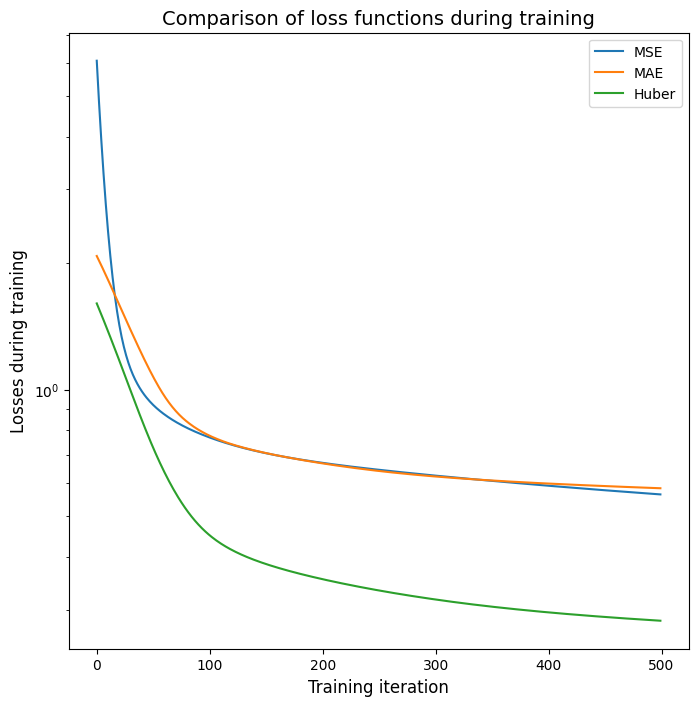

In [14]:
losses = [
    nn.MSELoss(),
    nn.L1Loss(),
    nn.SmoothL1Loss()
]
loss_names = [
    'MSE',
    'MAE',
    'Huber'
]

plot_losses(model, losses, loss_names)

From the chart, we can see `Huber loss` loss function has the best training result. Therefore, we can consider changing the loss function from `MSE` to `Huber loss` for this problem.

### Hyperparameter Tuning

#### 1. How many hidden layers (the depth of NN)?
- Starting by 1 layer, if the data is linearly separable, then you don't need any hidden layers at all. Of course, we don't even need an NN to resolve our data either, but it will still do the job.
- Beyond that, the consensus in this topic is the performance difference of adding additional hidden layers: there are very few cases where performance is improved by a second (or third, etc.) hidden layer. **One hidden layer is enough to solve most problems**.

#### 2. How many neurons in each hidden layers?
When tuning a neural network, there is no strict rule for the number of neurons in the hidden layers, but there are some commonly used heuristics:

**1. The number of neurons should be between the size of the input layer and the size of the output layer.**<br>
**2. The number of neurons should be 2/3 the size of the input layer, plus the size of the output layer.**<br>
**3. The number of neurons should be less than twice the size of the input layer.**<br>

Given that we have 8 input features and 1 output, according to the above heuristics, we might consider the following numbers of neurons for your hidden layers:<br>

- Between the size of the input and output: anywhere from **1** to **8** neurons.<br>
- 2/3 the size of the input plus the size of the output: approximately **6** neurons.<br>
- Less than twice the size of the input: fewer than **16** neurons.

#### 3. Hyperparameters can be tuned:
1. The number of hidden layer
2. The number of neurons
3. Activation function
4. Learning rate and/or momentum
5. Loss function

In [15]:
class TuningRegressionNN(nn.Module):
    def __init__(self, input_size, hidden_dim, num_layers, activation_fn):
        super(TuningRegressionNN, self).__init__()
        self.input_to_hidden = nn.Linear(input_size, hidden_dim)
        
        # Define hidden layers
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim) for _ in range(num_layers - 1)
        ])
        # Define activation function
        self.activation = activation_fn
        
        # Define output layer
        self.output_layer = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        # Input layer
        z = self.activation(self.input_to_hidden(x))
        
        # Hidden layers
        for layer in self.hidden_layers:
            z = self.activation(layer(z))      
        return self.output_layer(z)

In [16]:
# Define the callback for weight initialization
from skorch.callbacks import Callback
class InitWeightsCallback(Callback):
    def on_train_begin(self, net, **kwargs):
        net.module_.apply(init_weights)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score
from skorch import NeuralNetRegressor
from skorch.callbacks import EarlyStopping
from datetime import datetime

# Define custom MAPE scorer
def mape(y_true, y_pred):
    y_true = y_true.detach().numpy() if isinstance(y_true, torch.Tensor) else y_true
    y_pred = y_pred.detach().numpy() if isinstance(y_pred, torch.Tensor) else y_pred
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mape, greater_is_better=False)

# Define pipeline with Skorch NeuralNetRegressor
pipe = Pipeline([
    ('regressor', NeuralNetRegressor(
        module=TuningRegressionNN,
        module__input_size=X_train_tensor.shape[1],
        optimizer=torch.optim.SGD,
        criterion=nn.HuberLoss(),
        max_epochs=500,
        callbacks=[('early_stopping', EarlyStopping(patience=5)), InitWeightsCallback()],  
        verbose=0
    ))
])

start_time = datetime.now()
print(f"Start time: {start_time}")

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'regressor__module__hidden_dim': [8, 16, 32],
    'regressor__module__num_layers': [1, 2, 3],
    'regressor__module__activation_fn': [nn.ReLU(), nn.Tanh()],
    'regressor__optimizer__lr': [0.01, 0.05, 0.1],
}
# Calculate the total number of parameter combinations
total_combinations = np.prod([len(v) for v in param_grid.values()])
n_splits = 5
total_fits = total_combinations * n_splits
print(f"Total number of fits: {total_fits}")

# Define k-fold cross-validation with GridSearchCV
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipe, param_grid, cv=kf, scoring=mape_scorer, return_train_score=True,error_score='raise')
grid_search.fit(X_train_tensor, y_train_tensor)

# End timing
end_time = datetime.now()
print(f"End time: {end_time}")
duration = end_time - start_time
print(f"Duration: {duration}")

Start time: 2024-03-27 15:33:57.841639
Total number of fits: 270
End time: 2024-03-27 16:57:57.762410
Duration: 1:23:59.920771


In [20]:
# Get the best parameter combination and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Get the mean cross-validated score of the best estimator
best_mean_cv_score = grid_search.best_score_

# Get the training scores from cv_results_
training_scores = grid_search.cv_results_['mean_train_score']
training_scores_std = grid_search.cv_results_['std_train_score']

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_tensor)

# Evaluate the predictions
test_score = mape_scorer(best_model, X_test_tensor, y_test_tensor)  # Using the custom scorer

# Compare the training score and the test score
print(f"Best parameters: {best_params}")
print(f"Best mean CV score (MAPE): {-best_mean_cv_score:.4f}")
print(f"Test score (MAPE): {-test_score:.4f}")  # assuming mape_scorer is negative

# Calculate R2 score
r2 = r2_score(y_test_tensor, y_test_pred)
print(f'Test R2 Score: {r2:.3f}')

# Calculate accracy
accuracy = 100 - mape(y_test_tensor, y_test_pred)
print(f'Average Accuracy: {accuracy:.2f}%')

Best parameters: {'regressor__module__activation_fn': Tanh(), 'regressor__module__hidden_dim': 16, 'regressor__module__num_layers': 2, 'regressor__optimizer__lr': 0.05}
Best mean CV score (MAPE): 20.5663
Test score (MAPE): 20.1813
Test R2 Score: 0.792
Average Accuracy: 79.82%


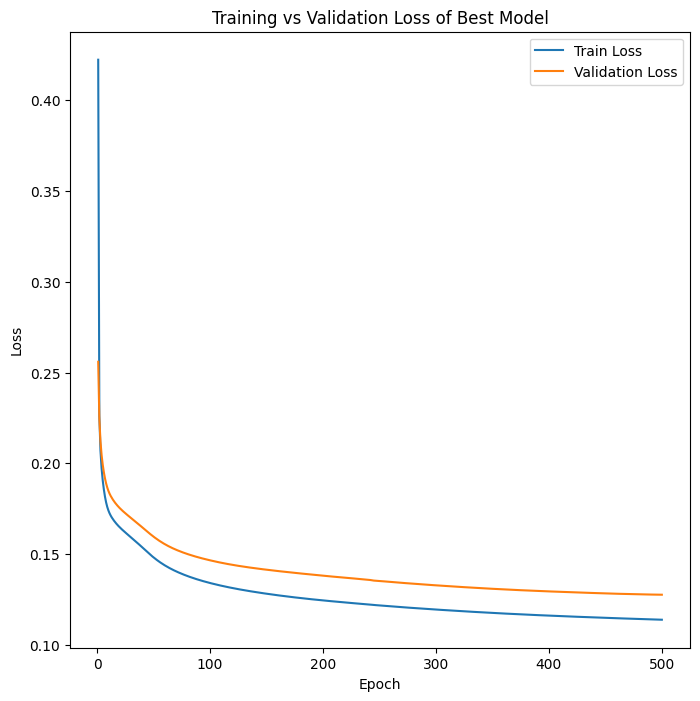

In [21]:
# Retrieve the best neural network estimator
best_net = grid_search.best_estimator_.named_steps['regressor']

# Access the history of the best model
history = best_net.history

# Plotting the loss
train_loss = [epoch['train_loss'] for epoch in history]
valid_loss = [epoch['valid_loss'] for epoch in history]
epochs = range(1, len(history) + 1)

plt.figure(figsize=(8, 8))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, valid_loss, label='Validation Loss')
plt.title('Training vs Validation Loss of Best Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()